# Plot select markers from Molecular Cartography

This script will produce plots for Molecular Cartography data used in Figure 1

In [1]:
# just installing napari, geopandas and tifffile should be enough to import everything
import pandas as pd
import napari
from tifffile.tifffile import imread
import geopandas as gp
from shapely.geometry import Polygon
import distinctipy
import seaborn as sns
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from spatialMI_functions import plot_layers_napari, crop_black_margins

# Create images from RNA spots using Napari

## Full tissue images

In [6]:
genes_of_interest = ["Nppa","Nppb", "Acta2","Lyz2","Col1a1", "Pecam1"]
samples = ["sample_control_r1_s1","sample_4h_r1_s1","sample_2d_r1_s1","sample_4d_r1_s1"]
#samples = ["sample_control_r1_s1"]
colors = ["#fc6b09","#0090ad","#cadb2b","#cb2027","#029e88", "#e18d9a"]

for sample in samples:
    napari_screenshot = '../../output/molkart_figure1_images/'+sample+'.napari_screen.full_image.png'
    #crop_screenshot = "../../output/molkart_figure1_images/"+sample+".napari_screen.full_image.cropped.png"
    #napari_layer = '../../output/molkart_figure1_images/'+sample+'.napari_screen.full_layer.tif'
    #image = imread('../../../data|/molcart_AB_stains/'+sample+'.DAPI.tiff')
    roi = pd.read_csv("../../data/molkart_tissue_regions_rois/"+sample+".figure_1_roi.csv")
    
    points =   pd.read_csv('../../../data/nf_molkart_results/dedup_spots/'+sample+'.spots_markedDups.txt', delimiter='\t', header=None)
    viewer = plot_layers_napari(points_data = points,genes_of_interest = genes_of_interest, image= None, roi = None, mask = None, color_palette= colors,pt_size=40,
                                output_path = napari_screenshot, scale_bar = True, font_size = 375, scale = 5, scalebar_length = 500,
                                img_type = "full_image",roi_plot = roi, box_edge_thickness = 80, 
                                crop_out_path =  "../../output/molkart_figure1_images/", sample = sample)

/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (99825000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (99825000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (99825000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (99825000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warning

In [38]:
roi_array = roi.iloc[:, -2:].to_numpy()
roi_array

array([[12500,  6700],
       [12500,  8200],
       [14000,  8200],
       [14000,  6700]])

sample_control_r1_s1 0.7147718174539631
sample_4h_r1_s1 1.1093731761410062
sample_2d_r1_s1 0.889396140278066
sample_4d_r1_s1 0.7782331275613426

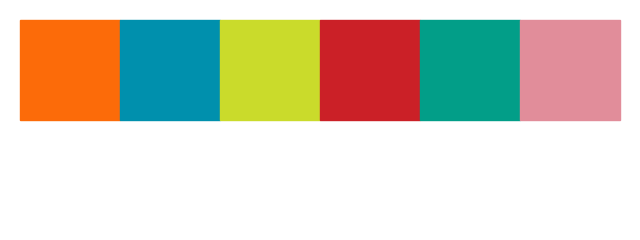

In [19]:
## Let's visualize the colors we used for plotting our RNA spots
distinctipy.color_swatch(colors)

## ROIs for each sample

In [9]:
genes_of_interest = ["Nppa","Nppb", "Acta2","Lyz2","Col1a1", "Pecam1"]
samples = ["sample_control_r1_s1","sample_4h_r1_s1","sample_2d_r1_s1","sample_4d_r1_s1"]
#samples = ["sample_4d_r1_s1"]
colors = ["#fc6b09","#0090ad","#cadb2b","#cb2027","#029e88", "#e18d9a"]

for sample in samples:
    napari_screenshot = '../../output/molkart_figure1_images/'+sample+'.napari_screen.roi_image.png'
    roi = pd.read_csv("../../data/molkart_tissue_regions_rois/"+sample+".figure_1_roi.csv")
    points =   pd.read_csv('../../../data/nf_molkart_results/dedup_spots/'+sample+'.spots_markedDups.txt', delimiter='\t', header=None)
    viewer = plot_points_napari(points_data = points,genes_of_interest = genes_of_interest, image= None, roi = roi, mask = None, color_palette= colors,pt_size=20,
                                output_path = napari_screenshot, scale_bar = True, font_size = 240, scale = 5, scalebar_length = 50,
                                img_type = "roi", crop_out_path =  "../../output/molkart_figure1_images/")

sample_control_r1_s1 1.0
sample_4h_r1_s1 1.1079881656804733
sample_2d_r1_s1 1.0067159167226327
sample_4d_r1_s1 1.0


# Create images for segmentation masks

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.io as io


samples = ["sample_control_r1_s1","sample_4h_r1_s1","sample_2d_r1_s1","sample_4d_r1_s1"]
img_dir = "../../../data/nf_molkart_results/preprocess/"
mask_dir = "../../../data/nf_molkart_results/retained_masks/"

In [11]:
sample = "sample_control_r1_s1"
dapi_wga = io.imread(img_dir + sample +".stack.clahe.tiff")
roi = pd.read_csv("../../data/molkart_tissue_regions_rois/"+sample+".segmentation_figure_1_roi.csv")

## Full DAPI + WGA image
plot_layers_napari(image = dapi_wga,image_channel_axis = 0, image_channel_colors = ["cyan","magenta"], points_data = None,genes_of_interest = None,
    roi = None, mask = None,pt_size=40,
    output_path = "../../output/molkart_segmentation_images/sample_control_r1_s1.DAPI_WGA.tif",
    scale_bar = True, font_size = 400, scale = 5, scalebar_length = 500, 
    img_type = "DAPI_WGA",roi_plot = roi, box_edge_thickness = 70,
    crop_out_path =  "../../output/molkart_segmentation_images/", sample = sample)

## Crop of DAPI + WGA image
plot_layers_napari(image = dapi_wga,image_channel_axis = 0, image_channel_colors = ["cyan","magenta"], points_data = None,genes_of_interest = None,
    roi = roi, mask = None,pt_size=40,
    output_path = "../../output/molkart_segmentation_images/sample_control_r1_s1.DAPI_WGA.roi.tif",
    scale_bar = True, font_size = 700, scale = 5, scalebar_length = 50, 
    img_type = "DAPI_WGA_roi",roi_plot = None, box_edge_thickness = 70,
    crop_out_path =  "../../output/molkart_segmentation_images/", sample = sample)


Context leak detected, msgtracer returned -1
/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (97102500 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (97102500 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [10]:
## Full mask
sample = "sample_control_r1_s1"
mask = io.imread(mask_dir + "sample_control_r1_s1_cellpose.retained_masks.tif").astype(np.int16)
roi = pd.read_csv("../../data/molkart_tissue_regions_rois/"+sample+".segmentation_figure_1_roi.csv")

plot_layers_napari(image = None,image_channel_axis = 0, image_channel_colors = ["cyan","magenta"], points_data = None,genes_of_interest = None,
    roi = None, mask = mask,pt_size=40,output_path = "../../output/molkart_segmentation_images/sample_control_r1_s1.cellpose_full_image.outline.tif",
    scale_bar = False, font_size = 160,
    scale = 5, scalebar_length = 500, img_type = "cellpose_mask",roi_plot = roi, box_edge_thickness = 70,
    crop_out_path =  "../../output/molkart_segmentation_images/", sample = sample, outline_mask = False)

## Crop of mask
plot_layers_napari(image = None,image_channel_axis = 0, image_channel_colors = ["cyan","magenta"], points_data = None,genes_of_interest = None,
    roi = roi, mask = mask,pt_size=40,
    output_path = "../../output/molkart_segmentation_images/sample_control_r1_s1.cellpose_full_image.roi.outline.tif",
    scale_bar = False, font_size = 400, 
    scale = 5, scalebar_length = 50, img_type = "cellpose_mask_roi",roi_plot = None, box_edge_thickness = 70,
    crop_out_path =  "../../output/molkart_segmentation_images/", sample = sample, outline_mask = False)


/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (99825000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (101227500 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


## Additional code to color mask by annotation

In [ ]:
# Create a napari viewer
viewer = napari.Viewer()
viewer.add_labels(mask)
viewer.screenshot(path = "../../output/molkart_segmentation_images/mask.tif", 
                      scale = 2)

In [68]:
# Load the labeled image mask

mask = io.imread(mask_dir + "sample_control_r1_s1_cellpose.retained_masks.tif").astype(np.int16)

# Get the unique labels in the mask and their corresponding indices
unique_labels, label_indices = np.unique(mask, return_inverse=True)

# Assign a random label between 1 and 8 to each unique label index
new_categories = np.zeros(len(unique_labels), dtype=int)
new_categories[1:] = np.random.randint(1, 9, size=len(unique_labels)-1)

# Assign Category 0 to Label 0
new_categories[unique_labels == 0] = 0

# Create a new table with the Label and Category columns
category_table = pd.DataFrame({'Label': unique_labels, 'Category': new_categories})

# Assign a random label between 1 and 8 to each unique label index
new_labels = np.zeros(len(unique_labels), dtype=int)
new_labels[1:] = np.random.randint(1, 9, size=len(unique_labels)-1)

# Use np.take() to apply the new labels to the mask
new_mask = np.take(new_labels, label_indices).reshape(mask.shape)

# Create a table with a single entry per category in new_mask, and assign each entry a color from the colorblind palette in the seaborn package
categories = np.unique(new_mask)
colors = sns.color_palette('colorblind', len(categories))
color_table = pd.DataFrame({'Category': categories, 'Color': colors})

# Assign each individual label in new_mask the corresponding color value from the color table
color_dict = {0: 'black'}
for i, label in enumerate(categories[1:]):
    color_dict[label] = color_table.loc[color_table['Category'] == label, 'Color'].values[0]

# Create a napari viewer
viewer = napari.Viewer()

# Add the new mask to the viewer
viewer.add_labels(new_mask, color = color_dict)


<Labels layer 'new_mask' at 0x3063d8510>

In [ ]:
# Create a napari viewer
viewer = napari.Viewer()

# Add the new mask to the viewer
viewer.add_labels(mask, name = "segmentation")

In [ ]:
create_colored_mask(mask_path = mask_dir + "sample_control_r1_s1_cellpose.retained_masks.tif", category_table = category_table, color_palette = "deep") 

In [63]:
import numpy as np
import cv2
from skimage.segmentation import find_boundaries

def create_grey_mask(mask):
    # Erode the mask by 2 pixels to create a 2 pixel black outline around all labels
    kernel = np.ones((3, 3), np.uint8)
    eroded_mask = cv2.erode(mask, kernel, iterations=2)

    # Find the boundaries of each label
    boundaries = find_boundaries(eroded_mask, mode='inner')

    return boundaries

In [18]:
import numpy as np
from skimage.segmentation import find_boundaries
import napari

def create_boundaries(mask):
    # Find the boundaries of each label
    boundaries = find_boundaries(mask, mode='thick')

    return boundaries

def create_grey_mask(mask):
    # Create a new mask with all labels colored grey
    grey_mask = np.zeros_like(mask)
    grey_mask[mask > 0] = 128

    return grey_mask

boundaries_mask = create_boundaries(mask)
# Add the new mask to the viewer
# Create a napari viewer
viewer = napari.Viewer()
viewer.add_image(boundaries_mask,colormap='gray', contrast_limits=[0, 1])

<Image layer 'boundaries_mask' at 0x17ed23650>